pip install ydata-profiling

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#create an array ,np.arange(12).reshape(3,4).Replace the array elements with their square values if the element is an even number. Keep the odd numbers as such. 
#Display the resulting array.

arr1=np.arange(12).reshape(3,4)
print(arr1)
arr2=np.where(arr1 % 2 ==0, arr1**2,arr1)
print(arr2)



[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[  0   1   4   3]
 [ 16   5  36   7]
 [ 64   9 100  11]]


In [3]:
#34.Read 10 records from dataframe and convert into json format and print the data
#import pandas as pd
test_df = pd.read_csv('test_measure.csv')
type(test_df)
sub_df = pd.read_csv('subject-info.csv')
type(sub_df)
top10_sub=sub_df.head(10)
json_format = top10_sub.to_json(orient='records',indent=1)
print(json_format)

[
 {
  "Age":10.8,
  "Weight":48.8,
  "Height":163.0,
  "Humidity":39.0,
  "Temperature":20.7,
  "Sex":1,
  "ID":543,
  "ID_test":"543_1"
 },
 {
  "Age":11.8,
  "Weight":41.0,
  "Height":150.0,
  "Humidity":41.0,
  "Temperature":22.3,
  "Sex":1,
  "ID":11,
  "ID_test":"11_1"
 },
 {
  "Age":12.2,
  "Weight":46.0,
  "Height":160.0,
  "Humidity":37.0,
  "Temperature":21.5,
  "Sex":0,
  "ID":829,
  "ID_test":"829_1"
 },
 {
  "Age":13.2,
  "Weight":71.0,
  "Height":190.0,
  "Humidity":49.0,
  "Temperature":23.8,
  "Sex":1,
  "ID":284,
  "ID_test":"284_1"
 },
 {
  "Age":13.7,
  "Weight":53.8,
  "Height":169.7,
  "Humidity":40.0,
  "Temperature":25.3,
  "Sex":0,
  "ID":341,
  "ID_test":"341_1"
 },
 {
  "Age":13.8,
  "Weight":53.4,
  "Height":171.0,
  "Humidity":42.0,
  "Temperature":24.4,
  "Sex":0,
  "ID":341,
  "ID_test":"341_2"
 },
 {
  "Age":14.0,
  "Weight":46.0,
  "Height":160.0,
  "Humidity":40.0,
  "Temperature":25.3,
  "Sex":0,
  "ID":343,
  "ID_test":"343_1"
 },
 {
  "Age":14.1,
  "

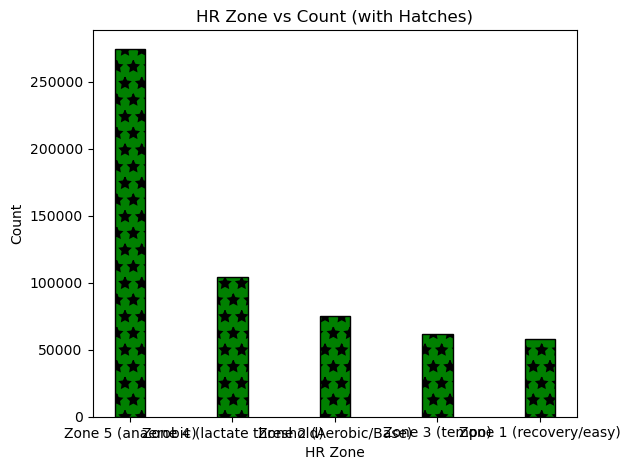

In [5]:
#35 Create a barchart for HR Zone vs count and apply hatches to the bars.
import matplotlib.pyplot as plt

def assign_heartrate(hr):
    if hr < 100:
        return "Zone 1 (recovery/easy)"
    elif hr>=100 and hr<=120:
        return "Zone 2 (Aerobic/Base)"
    elif hr>120 and hr<135:
        return "Zone 3 (tempo)"
    elif hr>=135 and hr<155:
        return "Zone 4 (lactate threshold)"
    elif hr>=155:
        return "Zone 5 (anaerobic)" 
test_df['hr_zone_cnt']=test_df['HR'].apply(assign_heartrate)

zone_counts = test_df['hr_zone_cnt'].value_counts() 
    
bars = plt.bar(zone_counts.index, zone_counts.values,edgecolor='black',width=0.3, color='green',align='center')    

for bar in bars:
    bar.set_hatch('*')

# Labels
plt.xlabel('HR Zone')
plt.ylabel('Count')
plt.title('HR Zone vs Count (with Hatches)')
plt.tight_layout()
plt.show()



In [7]:
#37 Who is the youngest athlete and how many tests did she take part in?
#find the youngest Athlete
young_athlete = sub_df.loc[sub_df["Age"].idxmin()]
young_test_id = young_athlete["ID"]
#find the total test count
young_test_count = test_df[test_df["ID"] == young_test_id].shape[0]
print( "         YOUNGEST ATHLETE INFO : ")
print(f"ID                :{young_test_id}")
print(f"Age               :{young_athlete['Age']}")
print(f"Total Test Count  :{young_test_count}")


         YOUNGEST ATHLETE INFO : 
ID                :543
Age               :10.8
Total Test Count  :676


In [ ]:
#38 Plot the changes in HR and VO2 over time for each ID_test. Add a trendline to compare the HR and VO2 changes.

fig, ax1 = plt.subplots(figsize=(12, 6))

color_hr = "tab:blue"
ax1.set_xlabel("Time")
ax1.set_ylabel("Heart Rate (HR)", color=color_hr)
sns.lineplot(data=test_df, x="Time", y="HR", hue="ID_test", ax=ax1, legend=False)
sns.regplot(data=test_df, x="time", y="HR", scatter=False, color=color_hr, ax=ax1, ci=None)
ax1.tick_params(axis="y", labelcolor=color_hr)


ax2 = ax1.twinx()  # create second y-axis
color_vo2 = "tab:red"
ax2.set_ylabel("VO₂", color=color_vo2)
sns.lineplot(data=test_df, x="time", y="VO2", hue="ID_test", ax=ax2, legend=False)
sns.regplot(data=test_df, x="time", y="VO2", scatter=False, color=color_vo2, ax=ax2, ci=None)
ax2.tick_params(axis="y", labelcolor=color_vo2)

plt.title("HR and VO₂ Over Time with Trendlines to Compare")
fig.tight_layout()
plt.show()


In [ ]:
#39 Find the average HRV for individual athletes, using short-term variability analysis(RMSSD).
test_df = test_df.sort_values(["ID_test", "time"])
test_df["RR_interval"] = 60000 / test_df["HR"]

# Step 2: Function to calculate RMSSD
def compute_rmssd(rr_intervals):
    diff_rr = np.diff(rr_intervals)
    return np.sqrt(np.mean(diff_rr ** 2))

# Step 3: Group by athlete and compute RMSSD
rmssd_df = test_df.groupby("ID_test")["RR"].apply(lambda x: compute_rmssd(x.values)).reset_index()
rmssd_df.columns = ["ID_test", "RMSSD"]

# Step 4: Show results
print(rmssd_df.head())

In [ ]:
#40 Identify the test that took the longest time to complete.
test_df['time'] = pd.to_numeric(test_df['time'], errors='coerce')

# Group by ID_test and calculate the max time 
test_duration = test_df.groupby('ID_test')['time'].max()
# Find the test that took the longest time
longest_test_id = test_duration.idxmax()
longest_duration = test_duration.max()

longest_id= longest_test_id.split('_')[0]

print("The test took the longest time to complete")
print(f"ID         : {longest_id}")
print(f"Time       : {longest_duration}") 


In [ ]:
pip install ydata-profiling

In [19]:
#41 Perform an EDA of subject_info using YDATA Profiling.
import pandas as pd
from ydata_profiling import ProfileReport

# Generate the profile report
profile = ProfileReport(sub_df, title="Subject Info EDA Report", explorative=True)

# Display in a Jupyter Notebook
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 238.64it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#42 "How does respiration rate progress based on treadmill speed for different BMI levels? 
#Visualize this relationship and find which BMI level has the highest mean respiration rate?"
sub_df1 = sub_df
sub_df1['Height_m'] = sub_df['Height'] / 100
sub_df1['BMI'] = sub_df['Weight']/sub_df['Height_m']**2

def bmi_types(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obese'
sub_df1['BMI_Category'] = sub_df1['BMI'].apply(bmi_types)
merged_df = pd.merge(test_df, sub_df1, on="ID_test")

grouped = merged_df.groupby(['Speed', 'BMI_Category'])['RR'].mean().reset_index()

# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped, x="Speed", y="RR", hue="BMI_Category", marker="^")
plt.title("Mean Respiration Rate vs Treadmill Speed by BMI Category")
plt.xlabel("Treadmill Speed")
plt.ylabel("Mean Respiration Rate (RR)")
plt.legend(title="BMI Category")
plt.grid(False)
plt.tight_layout()
plt.show()

mean_respirations = merged_df.groupby('BMI_Category')['RR'].mean().sort_values(ascending=False)
print("BMI level with highest mean respiration rate:")
print(mean_respirations)


In [ ]:
#43 Identify cases of possible bradycardia at rest and display number of athletes based on gender.
 #Filter for bradycardia -> Heart rate is less than 60p/min
bradycardia_df = merged_df[merged_df['HR'] < 60]
# Count number of cases by gender
bradycardia_counts = bradycardia_df['Sex'].value_counts()
gender_labels = ['Male - 0', 'Female - 1']
# Print the counts
print("Bradycardia cases by gender:")
print(bradycardia_counts)
# Plotting
sns.barplot(x=gender_labels, y=bradycardia_counts.values,palette="coolwarm",hue=bradycardia_counts.index,edgecolor='black',width=.5)
plt.title("Bradycardia Cases at Rest by Gender(HR <60)")
plt.xlabel("Gender")
plt.ylabel("Number of Athletes")
plt.tight_layout()
plt.show()

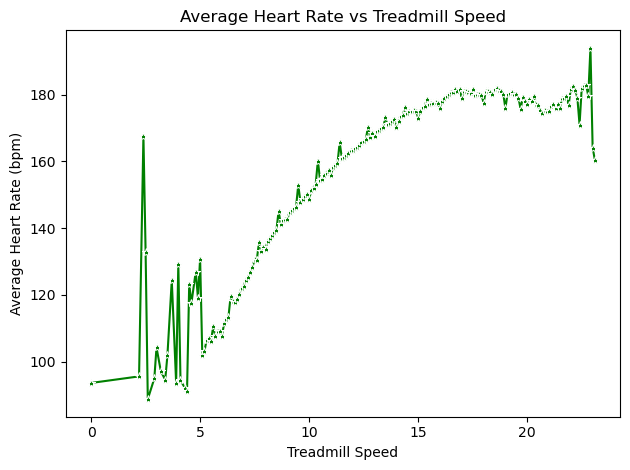

In [129]:
#44Calculate the average heart rate corresponding to the speed of the treadmill and  plot a line graph to visualize the relationship.

avg_hr_by_speed = test_df.groupby('Speed')['HR'].mean().reset_index()

# Line plot to show the relationship
sns.lineplot(data=avg_hr_by_speed, x='Speed', y='HR', marker='*', color='green')

# Line Graph 
plt.title('Average Heart Rate vs speed of Treadmill')
plt.xlabel('Treadmill Speed')
plt.ylabel('Average Heart Rate')
plt.tight_layout()
plt.show()

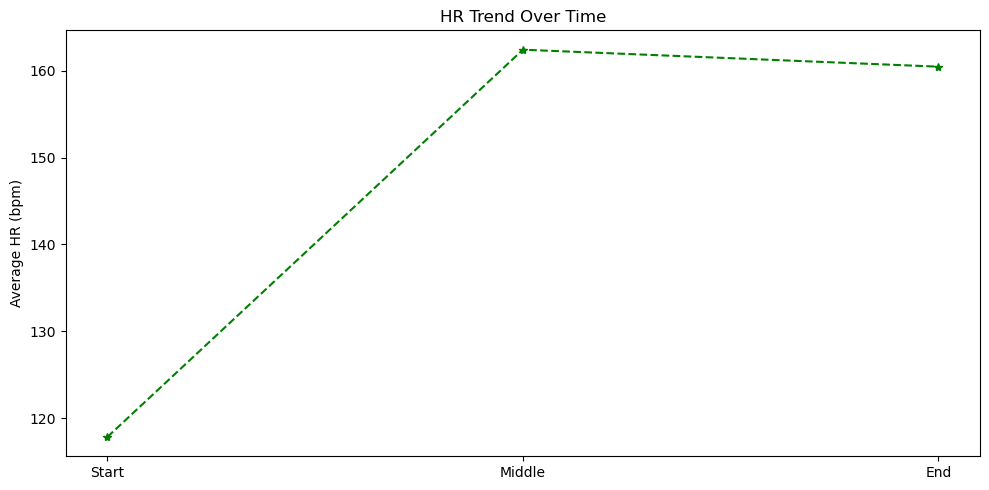

In [20]:
#45 Analyze the trend of HR at the start of the test vs the middle and the end.What is the overall trend?
trend_df = test_df.sort_values(by='time').reset_index(drop=True)
# Define block sizes (total lenght /3)
n = len(trend_df)
block_size = n // 3
# Slice the trend dataframe in to blocks 
start_hr = trend_df.iloc[:block_size]["HR"]
middle_hr = trend_df.iloc[block_size+1 : block_size*2]["HR"]
end_hr = trend_df.iloc[-block_size:]["HR"]

avg_hr = [start_hr.mean(), middle_hr.mean(), end_hr.mean()]
segments = ['Start', 'Middle', 'End']

# The HR trend plot 
plt.figure(figsize=(10, 5))
plt.plot(segments, avg_hr, marker='*', linestyle='--', color='green')
plt.title("HR Trend Over Time")
plt.ylabel("Average HR (bpm)")
plt.tight_layout()
plt.show()


In [22]:
#46Find the oldest athlete in the dataset and determine the number of breaths recorded for the oldest athlete during the test.
# Find the oldest athlete
oldest_athlete = sub_df.loc[sub_df["Age"].idxmax()]

athlete_id = oldest_athlete["ID"]

breath_count = test_df[test_df["ID"] == athlete_id]["RR"].count()

# Prepare result
print("Oldest Athlete information ") 
print("________________________________________________________________")
print(f"The number of breaths recorded during the test: {breath_count}")
print(oldest_athlete)



Oldest Athlete information 
________________________________________________________________
The number of breaths recorded during the test: 345
Age             63.0
Weight          83.5
Height         171.5
Humidity        48.0
Temperature     22.2
Sex                0
ID               296
ID_test        296_1
Name: 991, dtype: object


In [28]:
#47 Assuming age is given for the current year(2025) , list the participants born on leap year
sub_df1["DOB"]=2025-sub_df["Age"]

leap_year_df=sub_df1[sub_df1["DOB"]%4==0]

leap_year_cnt=len(leap_year_df)
print(f"total number of participants born on Leap year : {leap_year_cnt}")
print(" Participants born on Leap year ")
print(leap_year_df[["ID", "Age", "DOB"]])


total number of participants born on Leap year : 28
 Participants born on Leap year 
      ID   Age     DOB
113  177  17.0  2008.0
114  303  17.0  2008.0
115  346  17.0  2008.0
116  637  17.0  2008.0
244   83  21.0  2004.0
245  458  21.0  2004.0
246  773  21.0  2004.0
404   84  25.0  2000.0
405  183  25.0  2000.0
406  255  25.0  2000.0
407  263  25.0  2000.0
408  353  25.0  2000.0
409  391  25.0  2000.0
410  493  25.0  2000.0
555  491  29.0  1996.0
556  566  29.0  1996.0
557  857  29.0  1996.0
664  103  33.0  1992.0
665  763  33.0  1992.0
764   95  37.0  1988.0
765  196  37.0  1988.0
766  236  37.0  1988.0
767  253  37.0  1988.0
768  630  37.0  1988.0
769  632  37.0  1988.0
852  101  41.0  1984.0
853  363  41.0  1984.0
917  450  45.0  1980.0


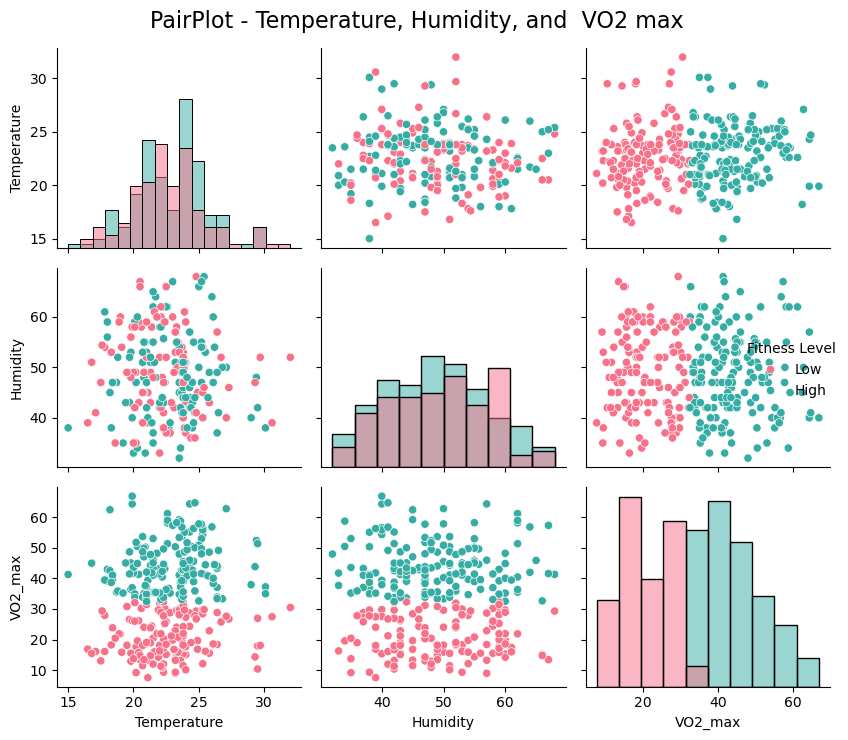

In [71]:
#48. "Use a pairplot to analyze the relationship between temperature, humidity, and  VO2 max (ml/kg/min) across different fitness levels

#Hint :Classify ""Fitness Level"" as ""Low"" if VO2 max (ml/kg/min) is below the median, otherwise classify as ""High."
merged_df["VO2"] = pd.to_numeric(merged_df["VO2"], errors="coerce")
merged_df["Weight"] = pd.to_numeric(merged_df["Weight"], errors="coerce")

# Compute VO2 max 
merged_df["VO2_max"] = merged_df["VO2"] / merged_df["Weight"]
merged_df = merged_df.dropna(subset=["VO2_max"])
median_vo2_max = merged_df["VO2_max"].median()
# Classify fitness level based on median VO2 max
def Fitness_check(VO2_max):
    if VO2_max < median_vo2_max:
        return "Low"
    else: 
        return "High"
         
merged_df["Fitness Level"] = merged_df["VO2_max"].apply(Fitness_check)
#the relationship between temperature, humidity, and  VO2 max (ml/kg/min) across different fitness level.
merged_df["Temperature"] = pd.to_numeric(merged_df["Temperature"], errors="coerce")
merged_df["Humidity"] = pd.to_numeric(merged_df["Humidity"], errors="coerce")
merged_df = merged_df.dropna(subset=["Temperature", "Humidity", "VO2_max"])
#jupter notebook hanging with merged_df for pairplot . so created sample dataset from merged file .
sample_df = merged_df.sample(n=300, random_state=40)

sns.pairplot(
    sample_df,
    vars=["Temperature", "Humidity", "VO2_max"],
       hue="Fitness Level",
    palette="husl",
    diag_kind="hist"
    
   
)
plt.suptitle("       PairPlot - Temperature, Humidity, and  VO2 max " ,fontsize=16)
plt.tight_layout()
plt.show()



